### Install and import pycatcher package

In [1]:
pip install pycatcher --upgrade


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycatcher as pc

### Package functions to detect outliers

- detect_outliers_classic(df): Detect outliers in a time-series dataframe using seasonal trend decomposition. 
- detect_outliers_today_classic(df) Detect outliers for the current date using Classical Seasonal Decomposition.
- detect_outliers_latest_classic(df): Detect latest outliers using Classical Seasonal Decomposition.
- detect_outliers_stl(df): Detect outliers using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_mstl(df): Detect outliers using Multiple Seasonal-Trend Decomposition using LOESS (MSTL).
- detect_outliers_today_stl(df) Detect outliers for the current date using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_latest_stl(df): Detect latest outliers using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_today_mstl(df) Detect outliers for the current date using MSTL.
- detect_outliers_latest_mstl(df): Detect latest outliers using MSTL.
- detect_outliers_iqr(df): Detect outliers in a time-series dataframe when there's less than 2 years of data.
- detect_outliers_moving_average(df): Detect outliers using moving average method.

##### Note - Use seasonal decomposition algorithms when there is at least 2 years of data, otherwise we can use Interquartile Range (IQR) or Moving Average methods for smaller timeframe.

### Diagnostic functions for plotting

In [3]:
from pycatcher.diagnostics import build_seasonal_plot_classic as build_seasonal_plot_classic
from pycatcher.diagnostics import build_outliers_plot_classic as build_outliers_plot_classic
from pycatcher.diagnostics import build_moving_average_outliers_plot as build_moving_average_outliers_plot
from pycatcher.diagnostics import build_outliers_plot_stl as build_outliers_plot_stl
from pycatcher.diagnostics import build_seasonal_plot_stl as build_seasonal_plot_stl
from pycatcher.diagnostics import build_outliers_plot_mstl as build_outliers_plot_mstl
from pycatcher.diagnostics import build_seasonal_plot_mstl as build_seasonal_plot_mstl
from pycatcher.diagnostics import build_monthwise_plot as build_monthwise_plot
from pycatcher.diagnostics import build_iqr_plot as build_iqr_plot
from pycatcher.diagnostics import build_decomposition_results as build_decomposition_results
from pycatcher.diagnostics import conduct_stationarity_check as conduct_stationarity_check

### Example 1 - Finding Outliers Using Classical Seasonal Decomposition Algorithm

In [4]:
!pip install fsspec


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install --upgrade certifi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
df_tsa=pd.read_csv("https://huggingface.co/datasets/bbgatch/tsa-passengers/resolve/main/tsa.csv",sep=',')

In [7]:
df_tsa.head(5)

,date,passengers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [8]:
x = pc.detect_outliers_latest_classic(df_tsa) 
print(x)

2024-12-15 16:05:03,619 - INFO - Detecting the latest outliers.
2024-12-15 16:05:03,620 - INFO - Starting outlier detection.
2024-12-15 16:05:03,957 - INFO - Time frequency: D
2024-12-15 16:05:03,957 - INFO - Length of time index: 2017.00
2024-12-15 16:05:03,957 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-15 16:05:03,957 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-15 16:05:03,959 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:03,960 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:03,960 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:03,960 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:03,961 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:03,962 - INFO - Calculating the sum of squares.
2024-12-15 16:05:03,962 - INFO - Sum of squares calculated: 1.60
2024-12-15 16

            passengers
date                  
2024-07-09     2580013


In [9]:
x = pc.detect_outliers_classic(df_tsa) 
print(x)

2024-12-15 16:05:03,969 - INFO - Starting outlier detection.
2024-12-15 16:05:03,975 - INFO - Time frequency: D
2024-12-15 16:05:03,975 - INFO - Length of time index: 2017.00
2024-12-15 16:05:03,975 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-15 16:05:03,975 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-15 16:05:03,977 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:03,977 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:03,978 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:03,978 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:03,978 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:03,979 - INFO - Calculating the sum of squares.
2024-12-15 16:05:03,979 - INFO - Sum of squares calculated: 1.60
2024-12-15 16:05:03,979 - INFO - Sum of squares of ACF: 1.60
2024-12-15 16:05

            passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-31     1665839
2023-11-21 

In [10]:
x = pc.detect_outliers_today_classic(df_tsa) 
print(x)

2024-12-15 16:05:03,985 - INFO - Detecting today's outliers.
2024-12-15 16:05:03,986 - INFO - Starting outlier detection.
2024-12-15 16:05:03,990 - INFO - Time frequency: D
2024-12-15 16:05:03,991 - INFO - Length of time index: 2017.00
2024-12-15 16:05:03,991 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-15 16:05:03,991 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-15 16:05:03,993 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:03,994 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:03,994 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:03,994 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:03,994 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:03,995 - INFO - Calculating the sum of squares.
2024-12-15 16:05:03,995 - INFO - Sum of squares calculated: 1.60
2024-12-15 16:05

No Outliers Today!


In [11]:
x = pc.detect_outliers_latest_classic(df_tsa) 
print(x)

2024-12-15 16:05:04,002 - INFO - Detecting the latest outliers.
2024-12-15 16:05:04,003 - INFO - Starting outlier detection.
2024-12-15 16:05:04,008 - INFO - Time frequency: D
2024-12-15 16:05:04,009 - INFO - Length of time index: 2017.00
2024-12-15 16:05:04,009 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-12-15 16:05:04,009 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-15 16:05:04,011 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:04,011 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:04,011 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:04,012 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:04,012 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:04,013 - INFO - Calculating the sum of squares.
2024-12-15 16:05:04,013 - INFO - Sum of squares calculated: 1.60
2024-12-15 16

            passengers
date                  
2024-07-09     2580013


2024-12-15 16:05:04,024 - INFO - Building outlier plot using classical seasonal decomposition.
2024-12-15 16:05:04,031 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:04,032 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:04,033 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:04,033 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:04,033 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:04,034 - INFO - Calculating the sum of squares.
2024-12-15 16:05:04,035 - INFO - Sum of squares calculated: 1.60
2024-12-15 16:05:04,035 - INFO - Sum of squares of ACF: 1.60
2024-12-15 16:05:04,035 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:04,036 - INFO - Calculating the sum of squares.
2024-12-15 16:05:04,036 - INFO - Sum of squares calculated: 1.69
2024-12-15 16:05:04,036 - INFO - Sum of squares of ACF: 1.69
2024-12-15 16:05:04,037 - INFO - 

Additive Model
Outliers:             passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-3

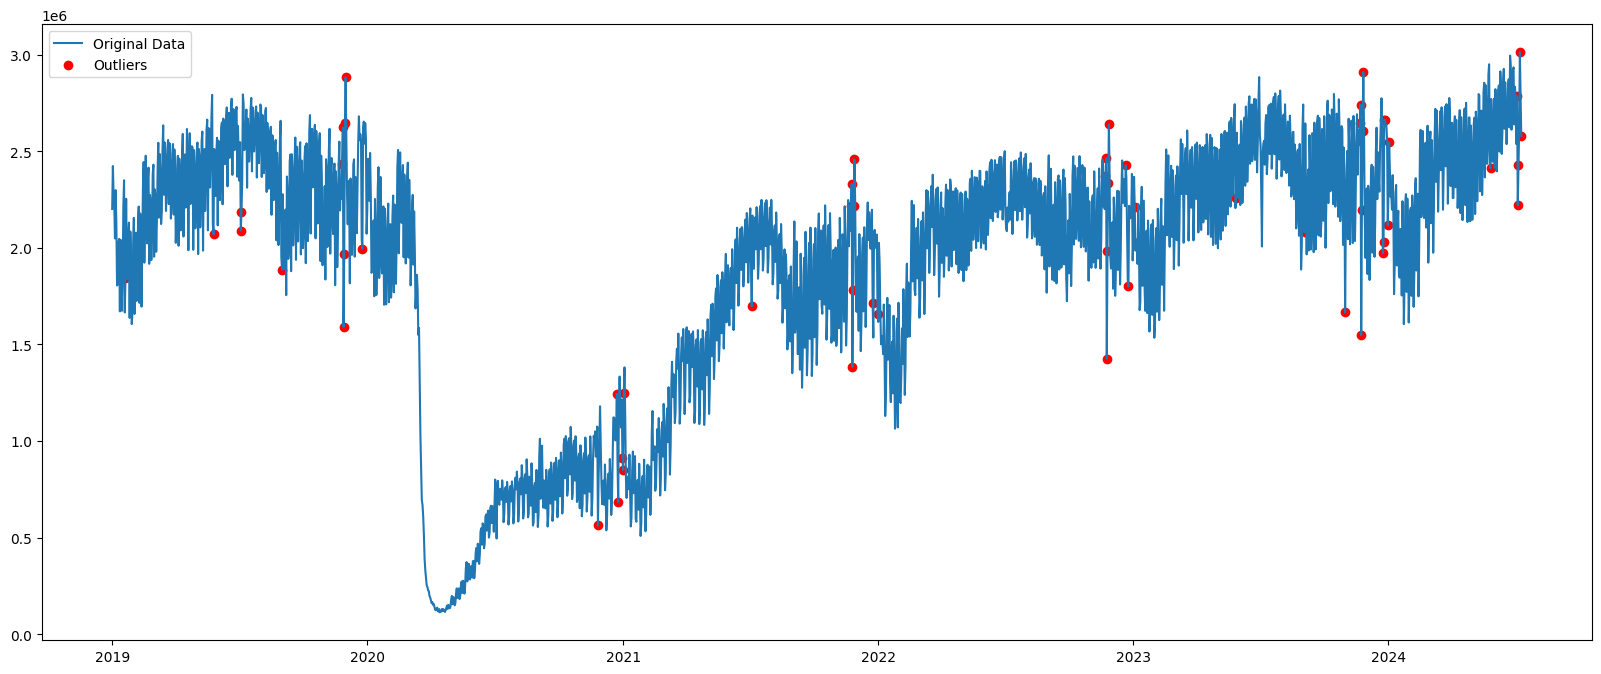

In [12]:
build_outliers_plot_classic(df_tsa)

2024-12-15 16:05:04,303 - INFO - Building month-wise box plot.
2024-12-15 16:05:04,335 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-15 16:05:04,340 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


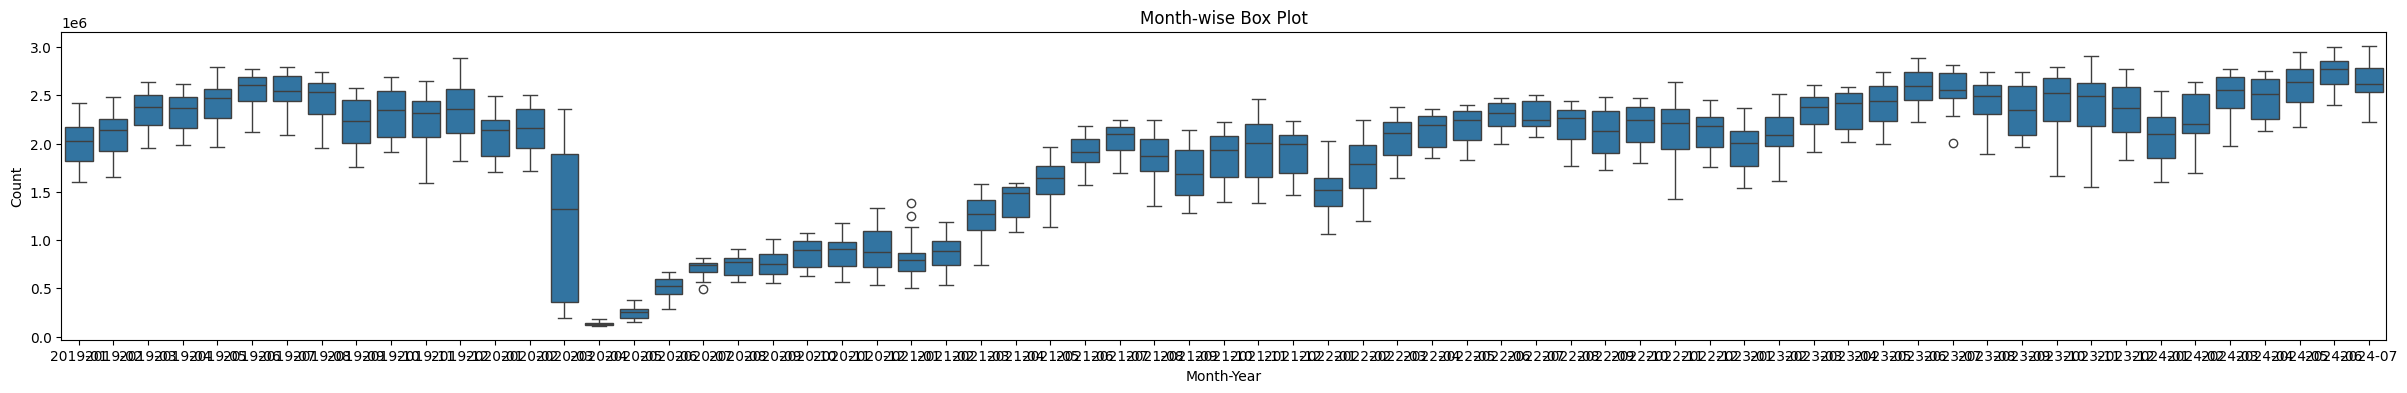

In [13]:
#Diagnostic plots
build_monthwise_plot(df_tsa)

2024-12-15 16:05:04,742 - INFO - Building time-series plot for seasonal decomposition.
2024-12-15 16:05:04,746 - INFO - Time-series data length: 5.00 years
2024-12-15 16:05:04,747 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:04,747 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:04,749 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:04,749 - INFO - Number of residuals after NaN removal: 2017
2024-12-15 16:05:04,749 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:04,750 - INFO - Calculating the sum of squares.
2024-12-15 16:05:04,750 - INFO - Sum of squares calculated: 1.60
2024-12-15 16:05:04,750 - INFO - Sum of squares of ACF: 1.60
2024-12-15 16:05:04,750 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:04,751 - INFO - Calculating the sum of squares.
2024-12-15 16:05:04,751 - INFO - Sum of squares calculated: 1.69
2024-12-15 16:05:04,751 - INFO - 

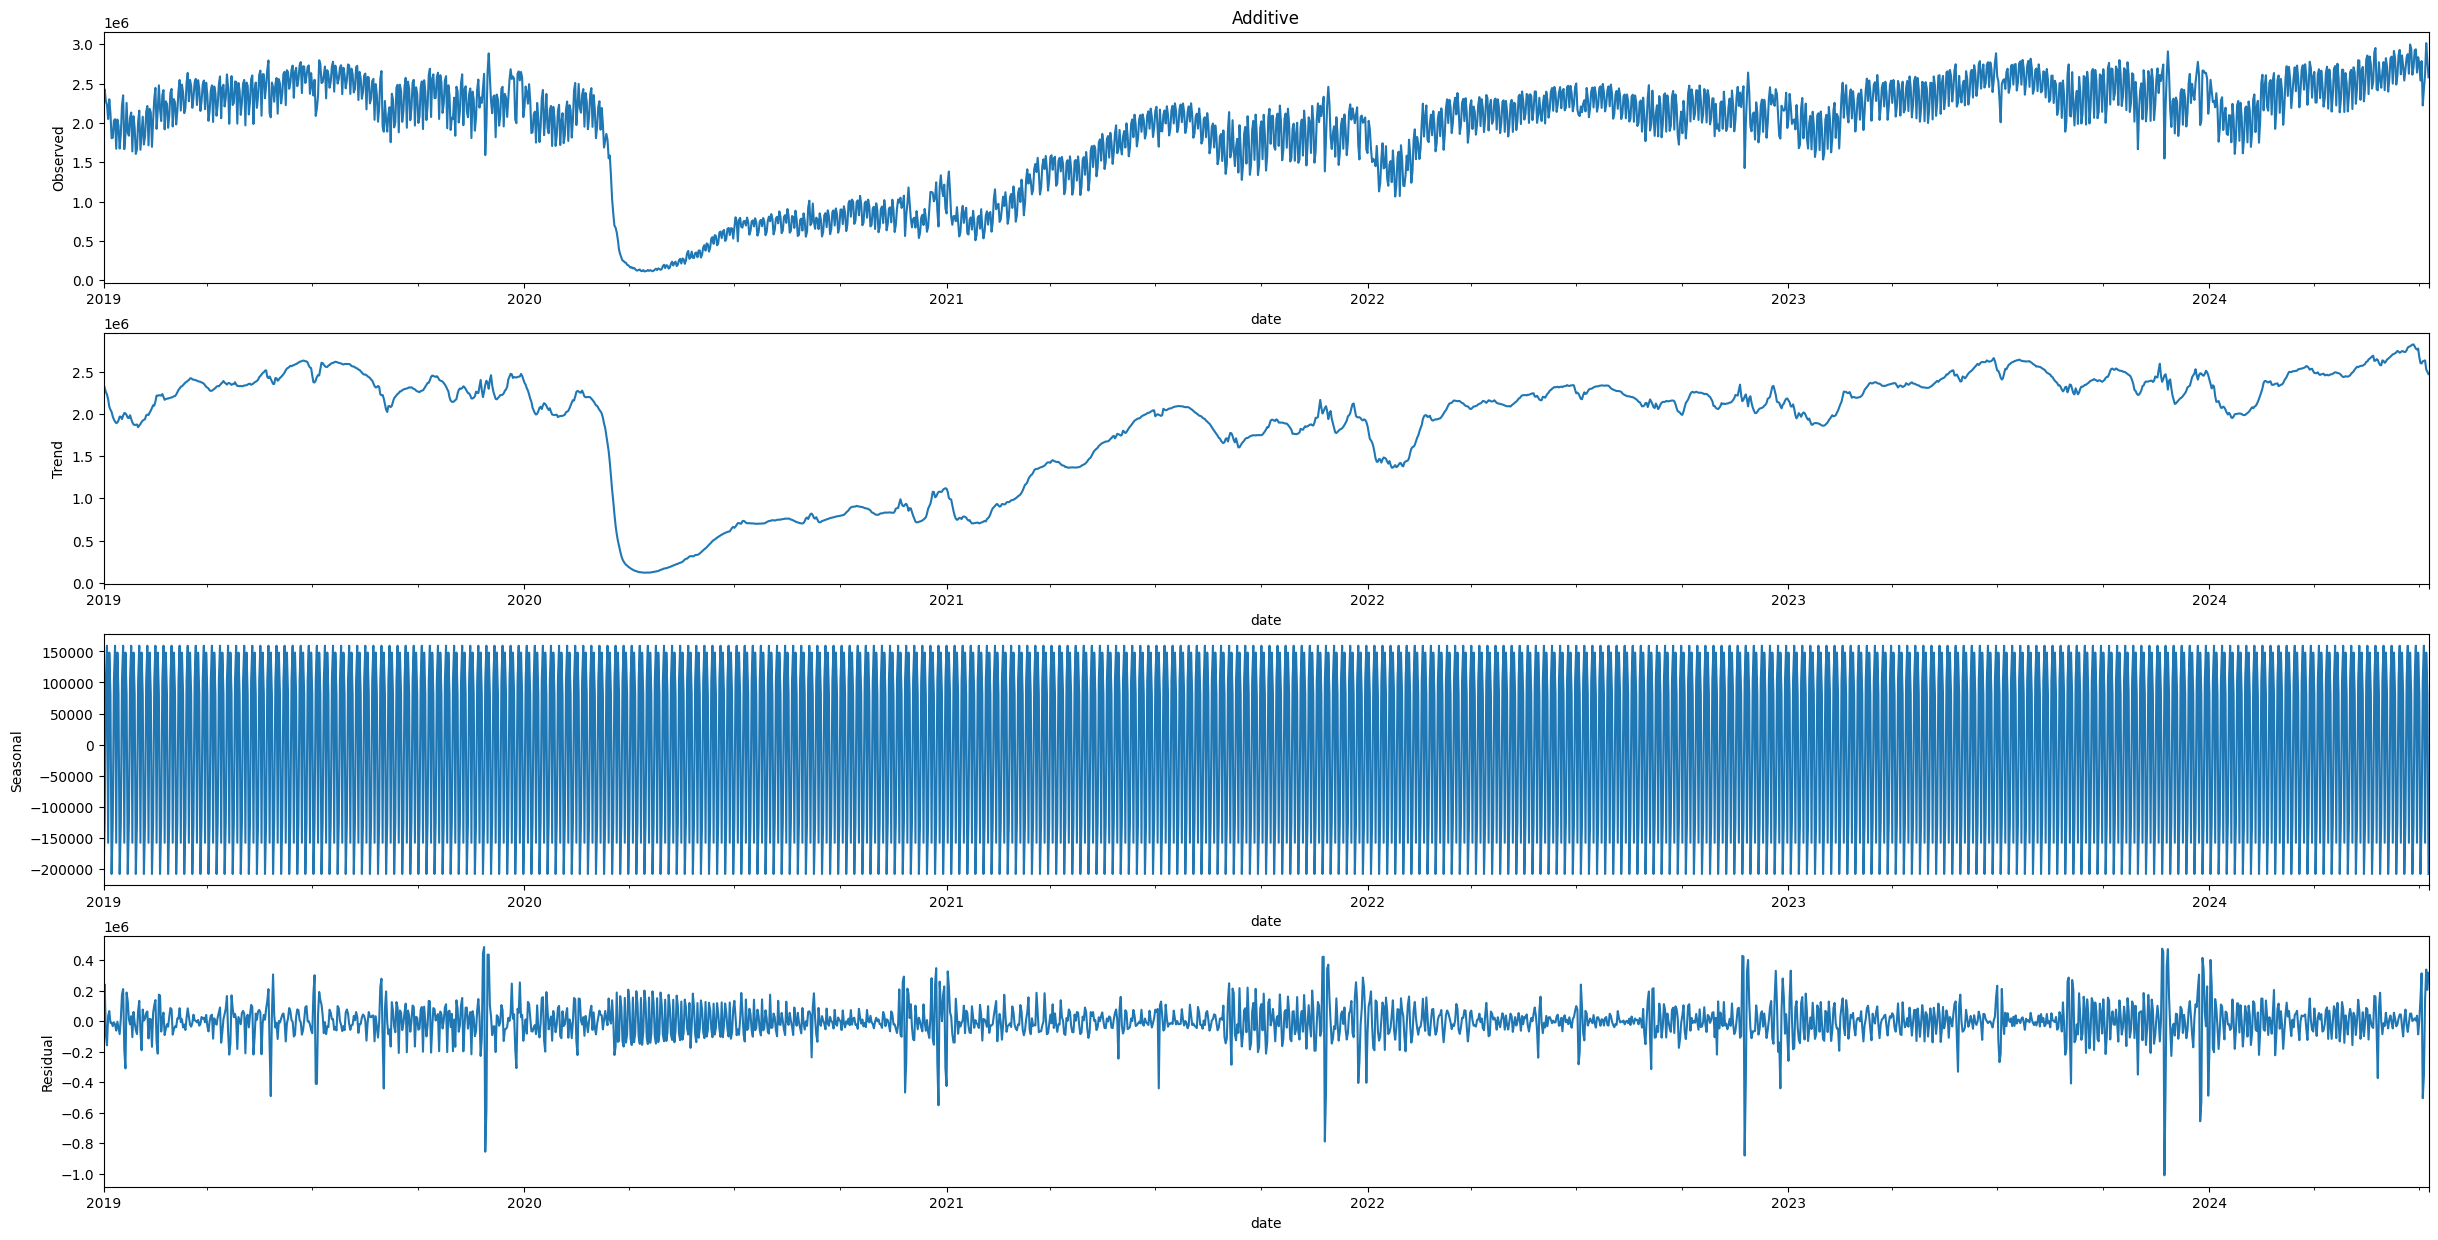

In [14]:
#Diagnostic plots
build_seasonal_plot_classic(df_tsa)

In [15]:
df_ice = pd.read_csv("https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")
df_ice.head(10)

,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22
5,2004-06,25
6,2004-07,27
7,2004-08,21
8,2004-09,18
9,2004-10,14


In [16]:
x = pc.detect_outliers_classic(df_ice) 
print(x)

2024-12-15 16:05:05,543 - INFO - Starting outlier detection.
2024-12-15 16:05:05,576 - INFO - Time frequency: MS
2024-12-15 16:05:05,576 - INFO - Length of time index: 200.00
2024-12-15 16:05:05,576 - INFO - Using seasonal trend decomposition for for outlier detection in month level time-series.
2024-12-15 16:05:05,577 - INFO - Decomposing time-series for additive and multiplicative models.
2024-12-15 16:05:05,578 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:05,579 - INFO - Number of residuals after NaN removal: 200
2024-12-15 16:05:05,579 - INFO - Extracting residuals and removing NaN values.
2024-12-15 16:05:05,579 - INFO - Number of residuals after NaN removal: 200
2024-12-15 16:05:05,579 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-12-15 16:05:05,580 - INFO - Calculating the sum of squares.
2024-12-15 16:05:05,580 - INFO - Sum of squares calculated: 3.47
2024-12-15 16:05:05,580 - INFO - Sum of squares of ACF: 3.47
2024-12-15 16:05

            interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66


### Example 2 - Finding Outliers Using Seasonal-Trend Decomposition using LOESS (STL)

In [17]:
pc.detect_outliers_stl(df_ice)

2024-12-15 16:05:05,586 - INFO - Starting outlier detection using STL
2024-12-15 16:05:05,588 - INFO - Time frequency: MS
2024-12-15 16:05:05,589 - INFO - Length of time index: 200.00
2024-12-15 16:05:05,589 - INFO - Detected Period: 12
2024-12-15 16:05:05,589 - INFO - Derived Seasonal: 13
2024-12-15 16:05:05,596 - INFO - Additive model detected
2024-12-15 16:05:05,597 - INFO - Generating outlier detection using STL
2024-12-15 16:05:05,597 - INFO - Outlier detection using STL Additive Model
2024-12-15 16:05:05,599 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:05,600 - INFO - Outliers detected by MAD!
2024-12-15 16:05:05,601 - INFO - Generated outlier detection using STL
2024-12-15 16:05:05,601 - INFO - Completing outlier detection using STL


,month,interest
0,2011-04-01,45
1,2012-06-01,54
2,2016-11-01,46
3,2016-12-01,66
4,2017-01-01,35
5,2017-07-01,90
6,2017-12-01,36
7,2018-05-01,71
8,2018-12-01,35
9,2019-07-01,100


2024-12-15 16:05:05,606 - INFO - Starting outlier detection using STL
2024-12-15 16:05:05,609 - INFO - Time frequency: MS
2024-12-15 16:05:05,609 - INFO - Length of time index: 200.00
2024-12-15 16:05:05,617 - INFO - Additive model detected
2024-12-15 16:05:05,617 - INFO - Generating outlier detection using STL
2024-12-15 16:05:05,617 - INFO - Outlier detection using STL Additive Model
2024-12-15 16:05:05,620 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:05,620 - INFO - Outliers detected by MAD!
2024-12-15 16:05:05,621 - INFO - Generated outlier detection using STL
2024-12-15 16:05:05,622 - INFO - Completing outlier detection using STL


Detected Period:  12
Derived Seasonal:  13
Outliers:             interest
month               
2011-04-01        45
2012-06-01        54
2016-11-01        46
2016-12-01        66
2017-01-01        35
2017-07-01        90
2017-12-01        36
2018-05-01        71
2018-12-01        35
2019-07-01       100
2020-07-01        90


<module 'matplotlib.pyplot' from '/Users/aseem/Documents/GitHub/outlier_detection/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

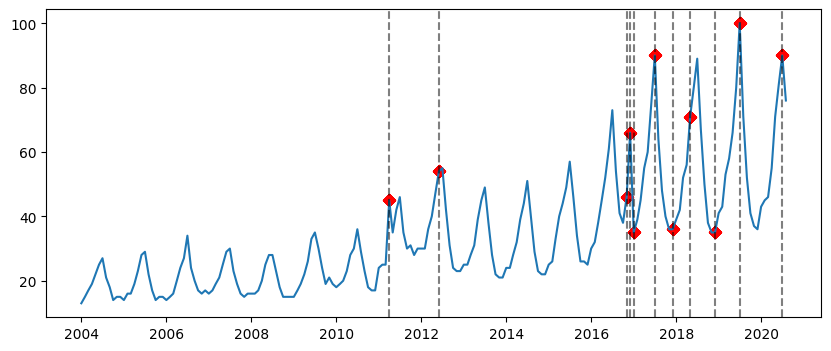

In [18]:
build_outliers_plot_stl(df_ice)

In [19]:
pc.detect_outliers_stl(df_tsa)

2024-12-15 16:05:05,760 - INFO - Starting outlier detection using STL
2024-12-15 16:05:05,763 - INFO - Time frequency: D
2024-12-15 16:05:05,763 - INFO - Length of time index: 2017.00
2024-12-15 16:05:05,763 - INFO - Detected Period: 365
2024-12-15 16:05:05,763 - INFO - Derived Seasonal: 365
2024-12-15 16:05:06,663 - INFO - Multiplicative model detected
2024-12-15 16:05:06,663 - INFO - Generating outlier detection using STL
2024-12-15 16:05:06,663 - INFO - Outlier detection using STL Multiplicative Model
2024-12-15 16:05:07,118 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:07,120 - INFO - Outliers detected by MAD!
2024-12-15 16:05:07,120 - INFO - Generated outlier detection using STL
2024-12-15 16:05:07,121 - INFO - Completing outlier detection using STL


,date,passengers
0,2020-02-17,2494922
1,2020-02-23,2380359
2,2020-03-01,2353150


In [20]:
pc.detect_outliers_today_stl(df_tsa) 

2024-12-15 16:05:07,125 - INFO - Detecting today's outliers.
2024-12-15 16:05:07,126 - INFO - Starting outlier detection using STL
2024-12-15 16:05:07,129 - INFO - Time frequency: D
2024-12-15 16:05:07,129 - INFO - Length of time index: 2017.00
2024-12-15 16:05:07,129 - INFO - Detected Period: 365
2024-12-15 16:05:07,129 - INFO - Derived Seasonal: 365
2024-12-15 16:05:08,049 - INFO - Multiplicative model detected
2024-12-15 16:05:08,049 - INFO - Generating outlier detection using STL
2024-12-15 16:05:08,050 - INFO - Outlier detection using STL Multiplicative Model
2024-12-15 16:05:08,502 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:08,503 - INFO - Outliers detected by MAD!
2024-12-15 16:05:08,504 - INFO - Generated outlier detection using STL
2024-12-15 16:05:08,504 - INFO - Completing outlier detection using STL
2024-12-15 16:05:08,505 - INFO - No outliers detected today.


'No Outliers Today!'

In [21]:
# Less than 2 years of data 

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 250, 450]
}

df = pd.DataFrame(df)
pc.detect_outliers_stl(df)

2024-12-15 16:05:08,509 - INFO - Starting outlier detection using STL
2024-12-15 16:05:08,511 - INFO - Time frequency: D
2024-12-15 16:05:08,511 - INFO - Length of time index: 5.00
2024-12-15 16:05:08,511 - INFO - Less than 2 years of data - Use Moving Average or IQR Method
2024-12-15 16:05:08,511 - INFO - Default - Using IQR method for outlier detection.
2024-12-15 16:05:08,512 - INFO - Detecting outliers using the IQR method.
2024-12-15 16:05:08,512 - INFO - Detecting outliers using the IQR method.
2024-12-15 16:05:08,513 - INFO - Outliers detected: 1 rows.
2024-12-15 16:05:08,514 - INFO - Outliers detected using IQR: 1 rows.


,Dt,Value
4,2024-01-05,450


2024-12-15 16:05:08,518 - INFO - Starting outlier detection using STL
2024-12-15 16:05:08,524 - INFO - Time frequency: D
2024-12-15 16:05:08,524 - INFO - Length of time index: 2017.00


Detected Period:  365
Derived Seasonal:  365


2024-12-15 16:05:09,424 - INFO - Multiplicative model detected
2024-12-15 16:05:09,424 - INFO - Generating outlier detection using STL
2024-12-15 16:05:09,425 - INFO - Outlier detection using STL Multiplicative Model
2024-12-15 16:05:09,877 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:09,878 - INFO - Outliers detected by MAD!
2024-12-15 16:05:09,879 - INFO - Generated outlier detection using STL
2024-12-15 16:05:09,880 - INFO - Completing outlier detection using STL


Outliers:             passengers
date                  
2020-02-17     2494922
2020-02-23     2380359
2020-03-01     2353150


<module 'matplotlib.pyplot' from '/Users/aseem/Documents/GitHub/outlier_detection/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

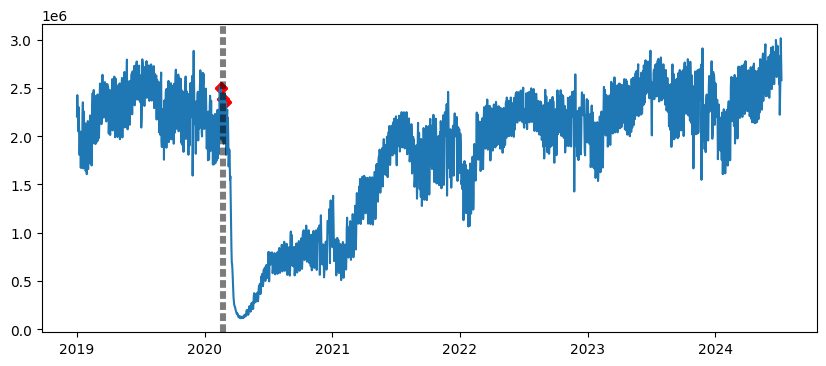

In [22]:
build_outliers_plot_stl(df_tsa)

2024-12-15 16:05:09,998 - INFO - Starting outlier detection using STL
2024-12-15 16:05:10,001 - INFO - Time frequency: D
2024-12-15 16:05:10,001 - INFO - Length of time index: 2017.00


Detected Period:  365
Derived Seasonal:  365


2024-12-15 16:05:10,900 - INFO - Multiplicative model detected
2024-12-15 16:05:11,028 - INFO - Completing seasonal decomposition plot using STL


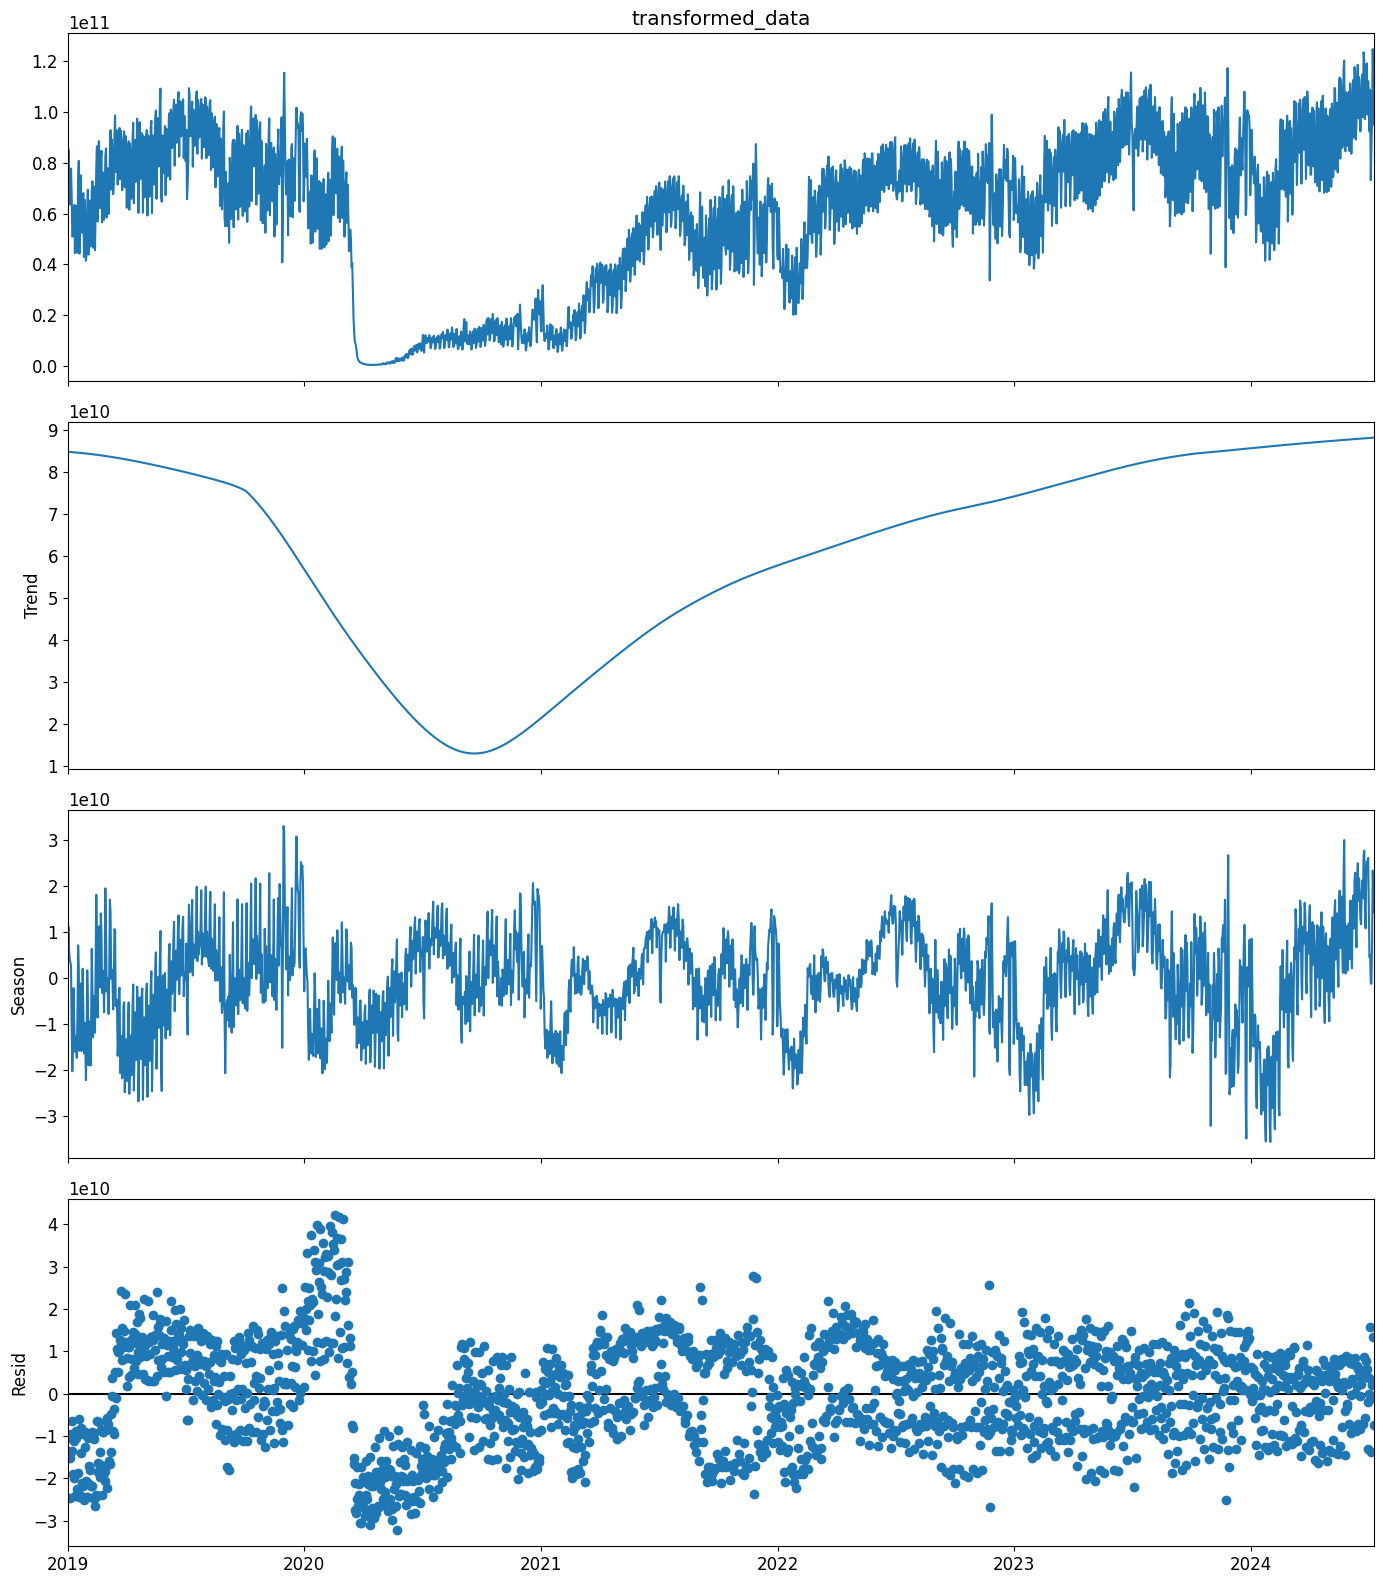

In [23]:
#Diagnostic plots
build_seasonal_plot_stl(df_tsa)

### Example 3 - Finding Outliers Using Multiple Seasonal-Trend Decomposition using LOESS (MSTL)

In [24]:
pc.detect_outliers_mstl(df_ice)

2024-12-15 16:05:11,640 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:11,642 - INFO - Time frequency: MS
2024-12-15 16:05:11,642 - INFO - Length of time index: 200.00
2024-12-15 16:05:11,642 - INFO - Derived Period: 12
2024-12-15 16:05:11,649 - INFO - Generating outlier detection using MSTL
2024-12-15 16:05:11,649 - INFO - Outlier detection using MSTL Additive Model
2024-12-15 16:05:11,652 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:11,652 - INFO - Outliers detected by MAD!
2024-12-15 16:05:11,653 - INFO - Generated outlier detection using MSTL
2024-12-15 16:05:11,653 - INFO - Completing outlier detection using MSTL


,month,interest
0,2011-04-01,45
1,2012-06-01,54
2,2016-11-01,46
3,2016-12-01,66
4,2017-01-01,35
5,2017-07-01,90
6,2017-12-01,36
7,2018-05-01,71
8,2018-12-01,35
9,2019-07-01,100


In [25]:
# Less than 2 years of data 

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 750, 160]
}

df = pd.DataFrame(df)
pc.detect_outliers_mstl(df)

2024-12-15 16:05:11,658 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:11,660 - INFO - Time frequency: D
2024-12-15 16:05:11,660 - INFO - Length of time index: 5.00
2024-12-15 16:05:11,661 - INFO - Less than 2 years of data - Use IQR or Moving Average Method
2024-12-15 16:05:11,661 - INFO - Default - Using IQR method for outlier detection.
2024-12-15 16:05:11,661 - INFO - Detecting outliers using the IQR method.
2024-12-15 16:05:11,662 - INFO - Detecting outliers using the IQR method.
2024-12-15 16:05:11,663 - INFO - Outliers detected: 1 rows.
2024-12-15 16:05:11,664 - INFO - Outliers detected using IQR: 1 rows.


,Dt,Value
3,2024-01-04,750


2024-12-15 16:05:11,668 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:11,671 - INFO - Time frequency: MS
2024-12-15 16:05:11,671 - INFO - Length of time index: 200.00
2024-12-15 16:05:11,672 - INFO - Derived Period: 12
2024-12-15 16:05:11,679 - INFO - Additive model detected
2024-12-15 16:05:11,679 - INFO - Generating outlier detection using MSTL
2024-12-15 16:05:11,679 - INFO - Outlier detection using MSTL Additive Model
2024-12-15 16:05:11,682 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:11,683 - INFO - Outliers detected by MAD!
2024-12-15 16:05:11,683 - INFO - Generated outlier detection using MSTL
2024-12-15 16:05:11,684 - INFO - Completing outlier detection using MSTL


Outliers:             interest
month               
2011-04-01        45
2012-06-01        54
2016-11-01        46
2016-12-01        66
2017-01-01        35
2017-07-01        90
2017-12-01        36
2018-05-01        71
2018-12-01        35
2019-07-01       100
2020-07-01        90


<module 'matplotlib.pyplot' from '/Users/aseem/Documents/GitHub/outlier_detection/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

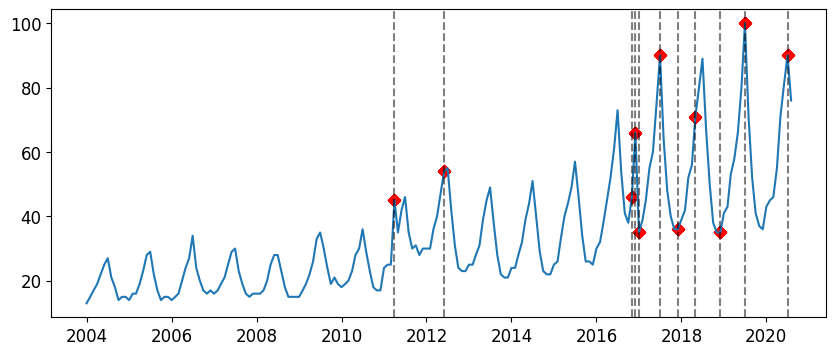

In [26]:
#Diagnostic plots
build_outliers_plot_mstl(df_ice)

In [27]:
x = pc.detect_outliers_latest_mstl(df_tsa) 
print(x)

2024-12-15 16:05:11,889 - INFO - Detecting the latest outliers.
2024-12-15 16:05:11,890 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:11,892 - INFO - Time frequency: D
2024-12-15 16:05:11,893 - INFO - Length of time index: 2017.00
2024-12-15 16:05:11,893 - INFO - Derived Period: (7, 365)
2024-12-15 16:05:13,861 - INFO - Generating outlier detection using MSTL
2024-12-15 16:05:13,861 - INFO - Outlier detection using MSTL Multiplicative Model
2024-12-15 16:05:14,840 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:14,841 - INFO - Outliers detected by MAD!
2024-12-15 16:05:14,842 - INFO - Generated outlier detection using MSTL
2024-12-15 16:05:14,842 - INFO - Completing outlier detection using MSTL
2024-12-15 16:05:14,842 - INFO - Detected the latest outlier!


        date  passengers
1 2020-02-17     2494922


In [28]:
pc.detect_outliers_today_mstl(df_tsa) 

2024-12-15 16:05:14,846 - INFO - Detecting today's outliers.
2024-12-15 16:05:14,847 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:14,849 - INFO - Time frequency: D
2024-12-15 16:05:14,849 - INFO - Length of time index: 2017.00
2024-12-15 16:05:14,849 - INFO - Derived Period: (7, 365)
2024-12-15 16:05:16,801 - INFO - Generating outlier detection using MSTL
2024-12-15 16:05:16,801 - INFO - Outlier detection using MSTL Multiplicative Model
2024-12-15 16:05:17,781 - INFO - Detecting outliers using the MAD method.
2024-12-15 16:05:17,782 - INFO - Outliers detected by MAD!
2024-12-15 16:05:17,782 - INFO - Generated outlier detection using MSTL
2024-12-15 16:05:17,783 - INFO - Completing outlier detection using MSTL
2024-12-15 16:05:17,783 - INFO - No outliers detected today.


'No Outliers Today!'

2024-12-15 16:05:17,787 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:17,788 - INFO - Time frequency: MS
2024-12-15 16:05:17,789 - INFO - Length of time index: 200.00
2024-12-15 16:05:17,789 - INFO - Derived Period: 12
2024-12-15 16:05:17,796 - INFO - Additive model detected
2024-12-15 16:05:17,941 - INFO - Completing seasonal decomposition plot using MSTL


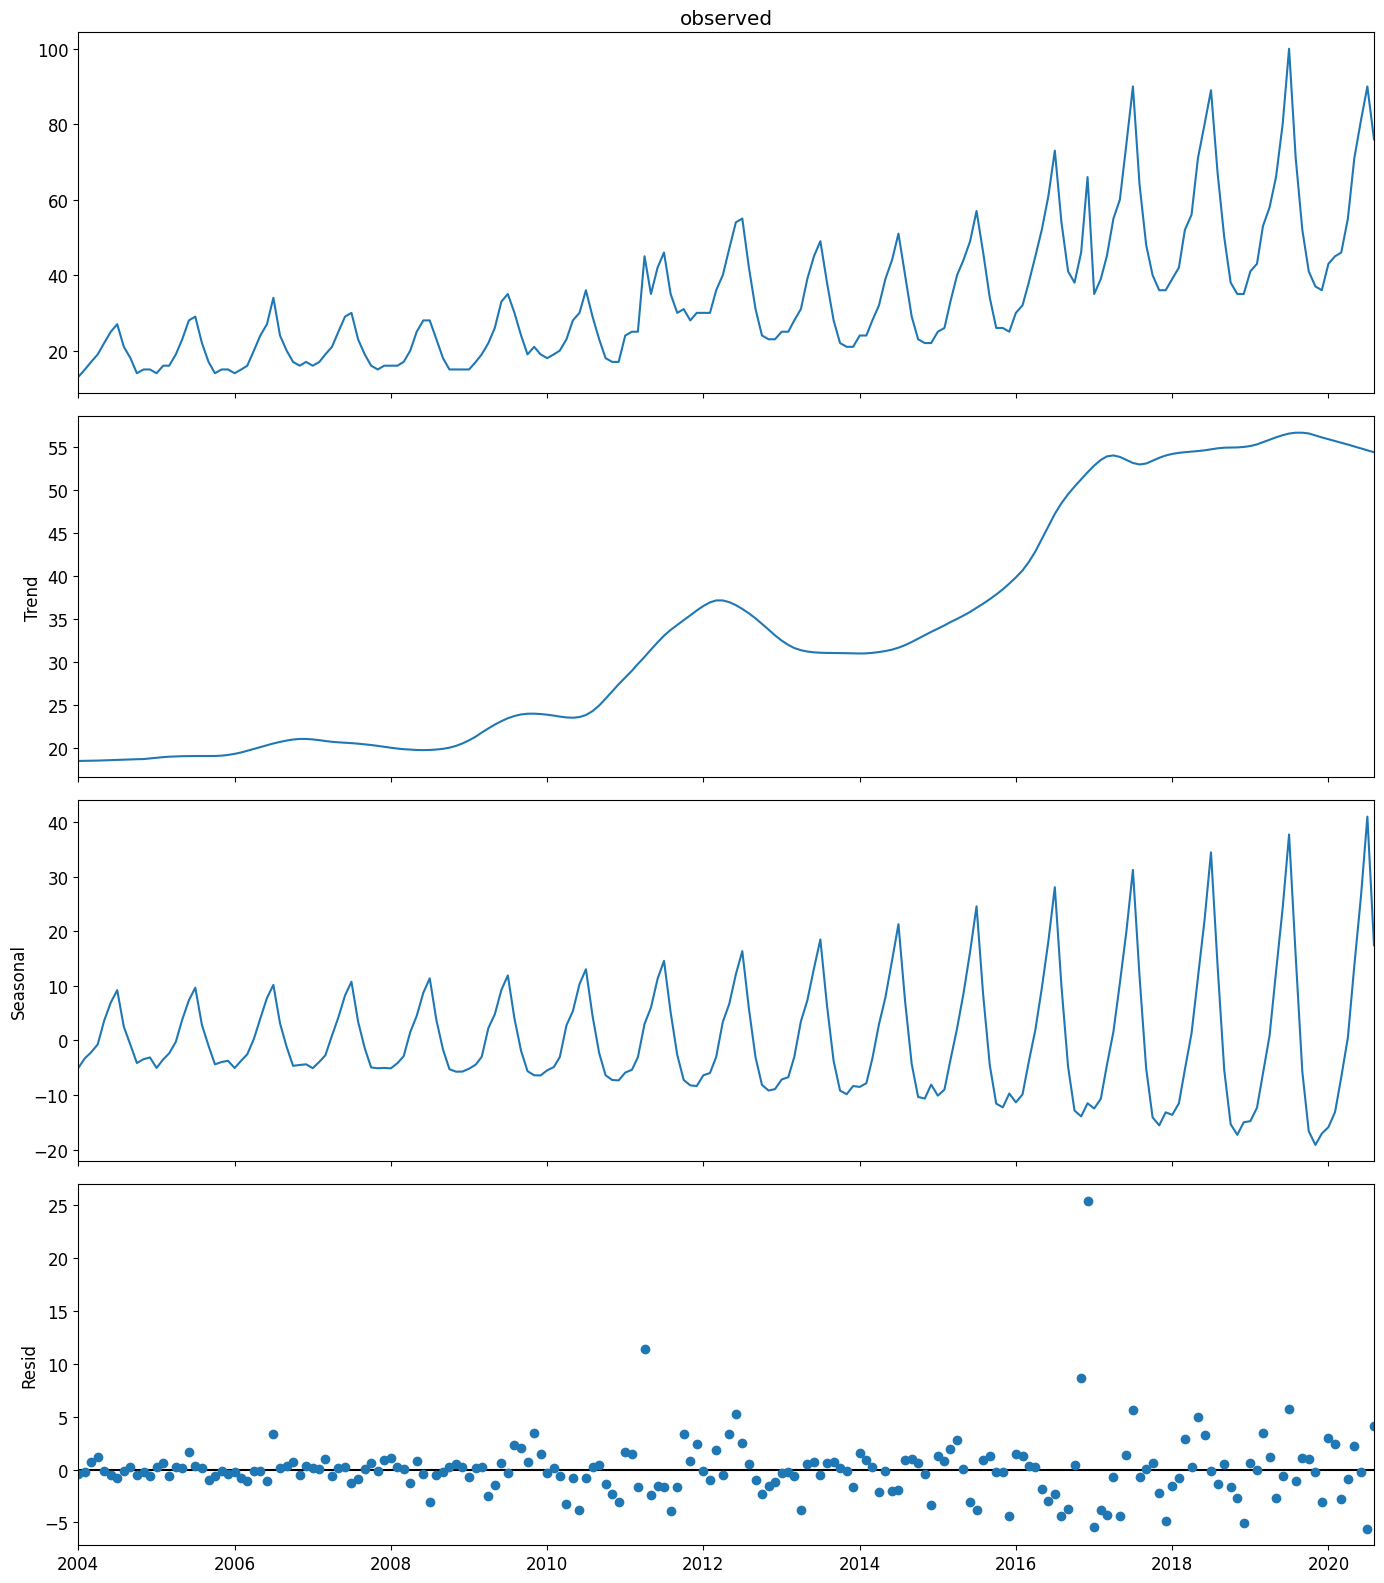

In [29]:
#Diagnostic plots
build_seasonal_plot_mstl(df_ice)

2024-12-15 16:05:18,527 - INFO - Starting outlier detection using MSTL
2024-12-15 16:05:18,530 - INFO - Time frequency: D
2024-12-15 16:05:18,530 - INFO - Length of time index: 2017.00
2024-12-15 16:05:18,530 - INFO - Derived Period: (7, 365)
2024-12-15 16:05:20,498 - INFO - Multiplicative model detected
2024-12-15 16:05:20,652 - INFO - Completing seasonal decomposition plot using MSTL


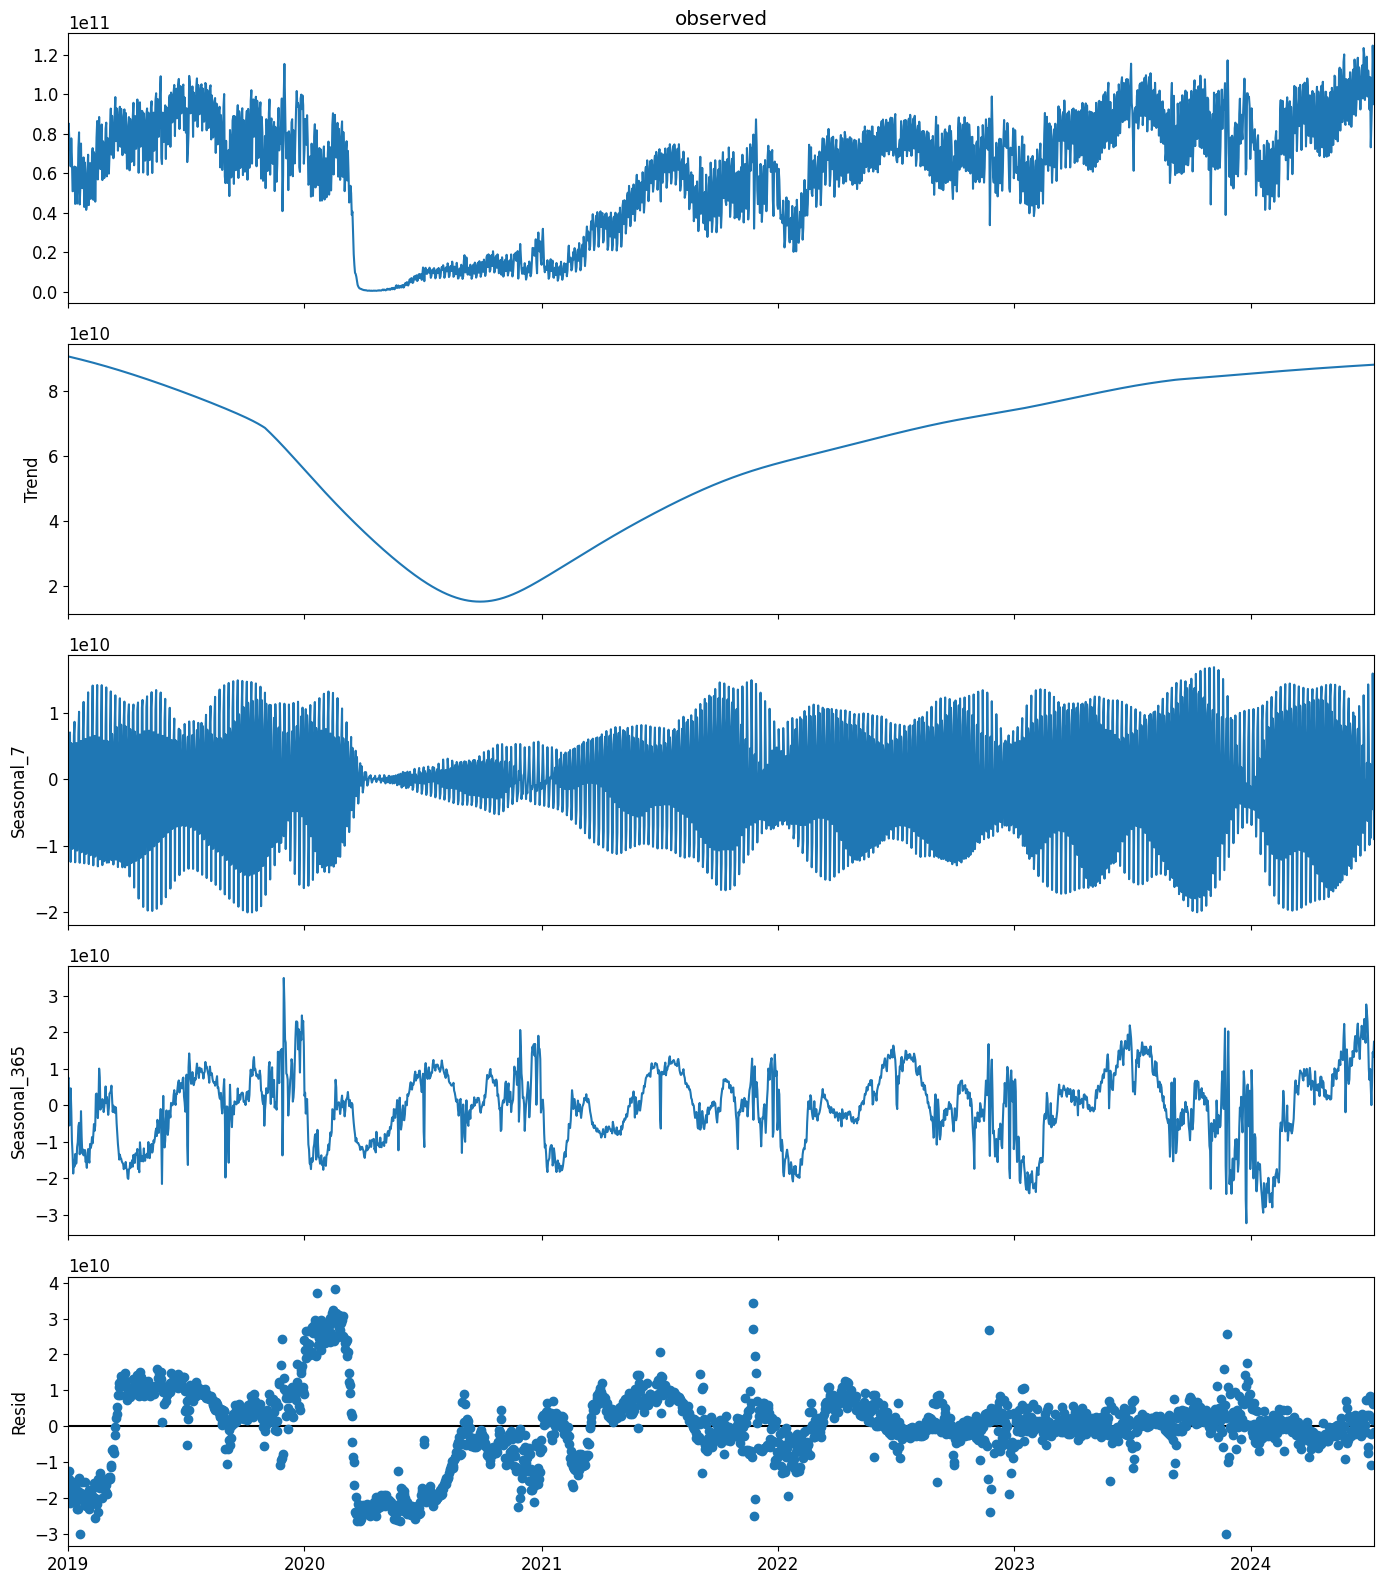

In [30]:
build_seasonal_plot_mstl(df_tsa)

### Example 4 - Finding Outliers Using IQR

In [31]:
import pandas as pd

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 450, 160]
}

df = pd.DataFrame(df)
pc.detect_outliers_classic(df)

2024-12-15 16:05:21,345 - INFO - Starting outlier detection.
2024-12-15 16:05:21,348 - INFO - Time frequency: D
2024-12-15 16:05:21,348 - INFO - Length of time index: 5.00
2024-12-15 16:05:21,349 - INFO - Using IQR method for outlier detection.
2024-12-15 16:05:21,349 - INFO - Detecting outliers using the IQR method.
2024-12-15 16:05:21,349 - INFO - Detecting outliers using the IQR method.
2024-12-15 16:05:21,351 - INFO - Outliers detected: 1 rows.
2024-12-15 16:05:21,351 - INFO - Outliers detected using IQR: 1 rows.


,Value
Dt,
2024-01-04,450


2024-12-15 16:05:21,355 - INFO - Building IQR plot to see outliers


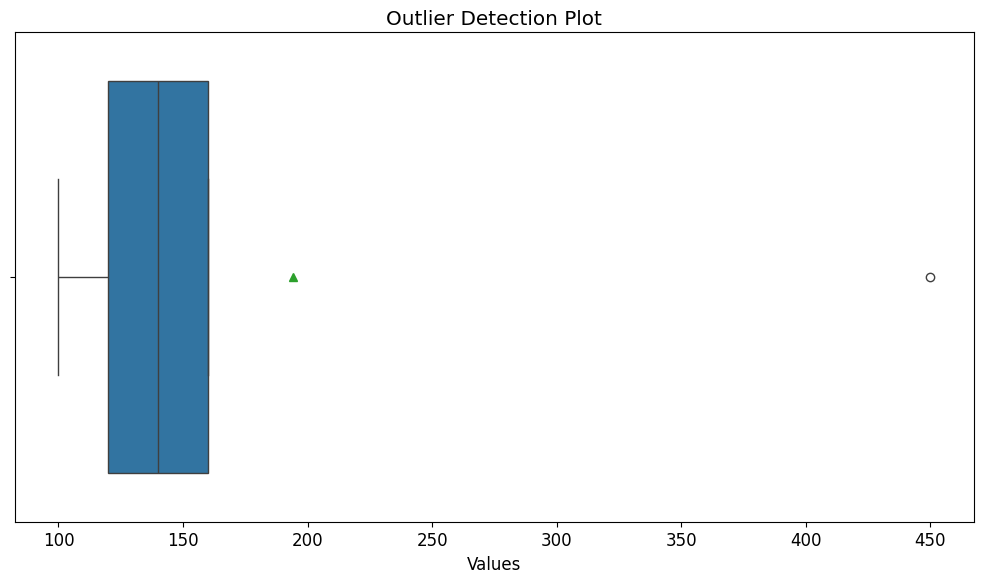

In [32]:
build_iqr_plot(df)

### Example 5 - Finding Outliers Using Moving Average

In [33]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'random numbers': np.random.randn(200)})
df.head(20)

,random numbers
0,1.659106
1,-0.783444
2,0.816116
3,-1.746990
4,-0.512257
5,-0.639136
6,-1.881705
7,-0.056370
8,0.035899
9,2.179053


2024-12-15 16:05:21,462 - INFO - Plotting outliers using Moving Average method
2024-12-15 16:05:21,462 - INFO - Starting optimal window size calculation
2024-12-15 16:05:21,462 - INFO - Starting RMSE calculation
2024-12-15 16:05:21,564 - INFO - RMSE calculation completed
2024-12-15 16:05:21,564 - INFO - Optimal Window Size: 2
2024-12-15 16:05:21,580 - INFO - Completed outliers plotting using Moving Average method


Outliers: Empty DataFrame
Columns: [date, passengers, moving_average, above_threshold, below_threshold]
Index: []


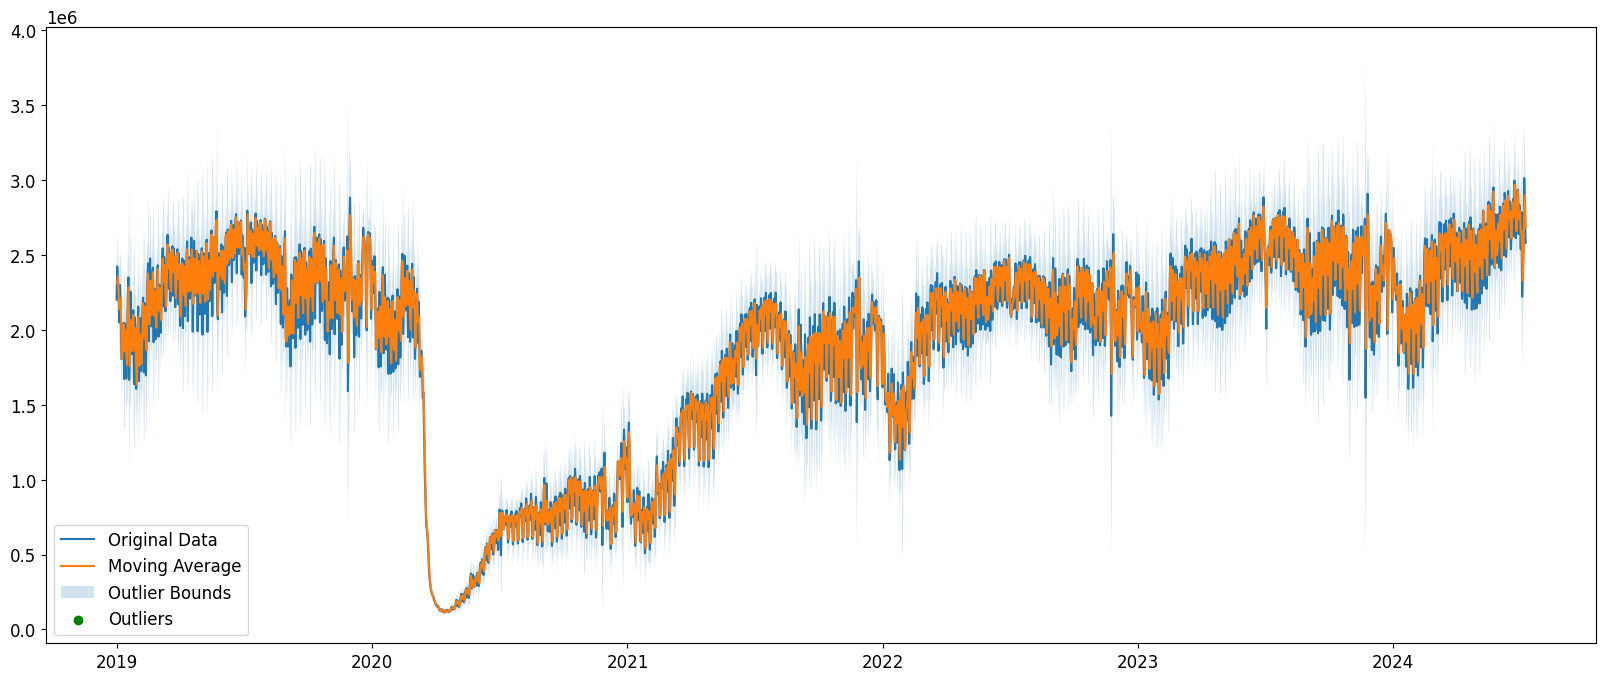

In [34]:
pc.build_moving_average_outliers_plot(df_tsa)

### Example 6 - Miscellaneous diagnostic function - Stationarity Check

In [35]:
conduct_stationarity_check(df_ice)

2024-12-15 16:05:21,912 - INFO - Starting ADF stationarity check
2024-12-15 16:05:21,917 - INFO - ADF Statistic: -0.072707
2024-12-15 16:05:21,917 - INFO - p-value: 0.952090
2024-12-15 16:05:21,917 - INFO - Critical Values:
2024-12-15 16:05:21,917 - INFO - 	1%: -3.466
2024-12-15 16:05:21,918 - INFO - 	5%: -2.877
2024-12-15 16:05:21,918 - INFO - 	10%: -2.575
2024-12-15 16:05:21,918 - INFO - Completed ADF stationarity check
2024-12-15 16:05:21,918 - INFO - Starting KPSS stationarity check
/Users/aseem/Documents/GitHub/outlier_detection/src/pycatcher/diagnostics.py:229: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df_pandas.iloc[:, -1])
2024-12-15 16:05:21,920 - INFO - KPSS Statistic: 2.040868
2024-12-15 16:05:21,920 - INFO - p-value: 0.010000
2024-12-15 16:05:21,921 - INFO - n_lags: 8.000000
2024-12-15 16:05:21,921 

ADF - The series is not Stationary


KPSS - The series is not Stationary
